<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<div align=center>
			<font face="IranNastaliq" size=30>
				<p></p>
				<p></p>
به نام خدا
				<p></p>
			</font>
			<font color=#FF7500>
دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
            </font>
			<p></p>
			<font color=blue>
هوش مصنوعی
            </font>
			<br />
			<br />
پاییز ۱۳۹۹
		</div>
		<div align=center>
		    <font color=#FF7500 size=6>
			    <br />
تمرین دوم، بخش دوم
                سوال عملی
            	<br/>
			</font>
        </style>
	</font>
    <hr/>
</div>

<div style="direction:rtl;line-height:300%;">
    <font face="XB Zar" size=5>
		برای این تمرین تعدادی تابع و کد داده شده، که با کامل کردن توابع باید پیاد‌سازی را انجام دهید. ابتدا لایبرری‌های لازم را وارد می‌کنیم. 
	</font>
</div>

In [112]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

<div style="direction:rtl;line-height:300%;">
    <font face="XB Zar" size=5>
		اکنون تصاویر را خوانده و نمایش می‌دهیم. تصویر پایین سمت راست عکس اصلی بوده و تصویر سمت چپ عکس پس از عبور از فیلتر است. 
	</font>
</div>

[]

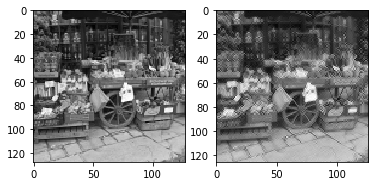

In [175]:
img_src = np.load('data/image.npy')
img_dst = np.load('data/result.npy')
_, axarr = plt.subplots(1,2)
axarr[0].imshow(img_src, cmap='gray')
axarr[1].imshow(img_dst, cmap='gray')
plt.plot()

<div style="direction:rtl;line-height:300%;">
    <font face="XB Zar" size=5>
        در این بخش، شما باید تابع preprocess را پیاده‌سازی کنید. این تابع به عنوان ورودی دو ماتریس بدست آمده در کد بالا را می‌گیرد. این تابع به کمک ماتریس اول یک ماتریس $126^2 \times 9$  (ماتریس $A$) ایجاد کرده و ماتریس تصویر دوم را به یک بردار $126^2$ (بردار $y$) تبدیل می‌کند و به عنوان خروجی می‌دهد. این ماتریس و بردار باید به‌گونه‌ای باشند که اگر وزن‌های فیلتر را به صورت بردار $w$ در نظر بگیریم، آنگاه داریم: $Aw = y$ 
	</font>
</div>

In [176]:
def preprocess(img_src, img_dst):
    
    A = np.zeros((126**2,9))
    y = np.zeros(126**2)
    
    # find A and y
    
    for i in range(126):
        for j in range(126):
            A[i*126 + j] = img_src[i:i+3,j:j+3].reshape((9,))
            
    y = img_dst.reshape((126**2,))
    
    return A, y

<div style="direction:rtl;line-height:300%;">
    <font face="XB Zar" size=5>
        اکنون در تابع زیر باید الگوریتم Gradient Decent را برای تابع $\lVert Aw-y\rVert^2_{2}$ پیاده سازی کنید.	
    <br>
    ابتدا مشتق این تابع را نسبت به وزن حساب می‌کنیم:
    $$
    \frac{\mathrm{d}\lVert Aw-y\rVert^2_2}{\mathrm{d}w} = \frac{\mathrm{d}(Aw-y)^T(Aw-y)}{\mathrm{d}w}
    = 2(Aw-y)^T\frac{\mathrm{d}(Aw-y)}{\mathrm{d}w} = 2(Aw-y)^TA
    $$
        در نتیجه رابطه به روز رسانی به شکل زیر در می‌آید.
    $$
    w_{i+1} = w_i - \alpha(Aw_i-y)^TA = w_i - \alpha A^T(Aw_i-y)
    $$
    </font>
</div>

In [178]:
def GD(A, y):
    
    w = np.zeros(9)
    
    # find a w that minimizes the error function
    
    lr = 9.5e-10 #learning rate
    epochs = 10000
    
    losses = np.empty(epochs)
    
    for i in range(epochs):
        dist = (A@w) - y
        loss = np.linalg.norm(dist)**2
        losses[i] = loss
        print(f"epoch {i+1} loss: {loss}")
        delta = lr * (A.T@dist)
        # print(dist)
        w = w - delta
        
    #################################################################
    # we compute the minimum error possible to see GD's performance
    # this part is not essential to the solution
    w_opt = np.linalg.pinv(A)@y
    print('----------------------------------------')
    print(f'optimum loss: {np.linalg.norm(A@w_opt - y)**2}')
    print(f'optimim weight:\n {w_opt.reshape((3, 3))}')
    print('----------------------------------------')
    #################################################################
    
    _, ax = plt.subplots()
    ax.semilogy(losses)
    ax.set_xlabel('epochs')
    ax.set_ylabel('loss')
    plt.show()

    return w

<div style="direction:rtl;line-height:300%;">
    <font face="XB Zar" size=5>
        توابع گفته شده را باید به‌گونه‌ای پیاده سازی کنید که با اجرای کد ماتریس وزن‌های فیلتر بدست آید.
	</font>
</div>

epoch 1 loss: 57061920.29494339
epoch 2 loss: 47547739.700625576
epoch 3 loss: 39639082.06385197
epoch 4 loss: 33064856.899541263
epoch 5 loss: 27599749.149020966
epoch 6 loss: 23056489.65980438
epoch 7 loss: 19279430.85281931
epoch 8 loss: 16139207.186388357
epoch 9 loss: 13528297.240885107
epoch 10 loss: 11357335.178646037
epoch 11 loss: 9552045.041500764
epoch 12 loss: 8050692.715113076
epoch 13 loss: 6801968.148205948
epoch 14 loss: 5763225.174904268
epoch 15 loss: 4899018.556224319
epoch 16 loss: 4179888.0530270725
epoch 17 loss: 3581347.817318745
epoch 18 loss: 3083046.4323550486
epoch 19 loss: 2668068.786218742
epoch 20 loss: 2322355.8292243304
epoch 21 loss: 2034222.3095819694
epoch 22 loss: 1793955.9429567666
epoch 23 loss: 1593484.2651999637
epoch 24 loss: 1426097.7394411762
epoch 25 loss: 1286219.6185716346
epoch 26 loss: 1169214.6681205388
epoch 27 loss: 1071230.1876563814
epoch 28 loss: 989063.8768658171
epoch 29 loss: 920054.0133856653
epoch 30 loss: 861988.1748819844
epo

epoch 596 loss: 66652.74705410146
epoch 597 loss: 66439.75886060794
epoch 598 loss: 66227.45742476395
epoch 599 loss: 66015.84045202039
epoch 600 loss: 65804.90565655164
epoch 601 loss: 65594.65076120848
epoch 602 loss: 65385.0734974718
epoch 603 loss: 65176.17160540608
epoch 604 loss: 64967.94283361381
epoch 605 loss: 64760.38493919003
epoch 606 loss: 64553.495687677474
epoch 607 loss: 64347.27285302188
epoch 608 loss: 64141.71421752785
epoch 609 loss: 63936.81757181507
epoch 610 loss: 63732.58071477492
epoch 611 loss: 63529.001453527315
epoch 612 loss: 63326.07760337812
epoch 613 loss: 63123.80698777686
epoch 614 loss: 62922.187438274705
epoch 615 loss: 62721.216794482876
epoch 616 loss: 62520.89290403153
epoch 617 loss: 62321.21362252868
epoch 618 loss: 62122.176813519814
epoch 619 loss: 61923.7803484476
epoch 620 loss: 61726.02210661202
epoch 621 loss: 61528.89997513092
epoch 622 loss: 61332.411848900636
epoch 623 loss: 61136.55563055724
epoch 624 loss: 60941.32923043795
epoch 625 

epoch 1105 loss: 13121.928608632377
epoch 1106 loss: 13080.122597446296
epoch 1107 loss: 13038.449788607479
epoch 1108 loss: 12996.909757586054
epoch 1109 loss: 12955.502081206694
epoch 1110 loss: 12914.226337644224
epoch 1111 loss: 12873.082106419313
epoch 1112 loss: 12832.06896839417
epoch 1113 loss: 12791.186505768233
epoch 1114 loss: 12750.434302073887
epoch 1115 loss: 12709.81194217221
epoch 1116 loss: 12669.319012248703
epoch 1117 loss: 12628.955099809038
epoch 1118 loss: 12588.719793674834
epoch 1119 loss: 12548.612683979487
epoch 1120 loss: 12508.633362163882
epoch 1121 loss: 12468.781420972293
epoch 1122 loss: 12429.056454448155
epoch 1123 loss: 12389.458057929929
epoch 1124 loss: 12349.985828046905
epoch 1125 loss: 12310.639362715185
epoch 1126 loss: 12271.418261133416
epoch 1127 loss: 12232.322123778793
epoch 1128 loss: 12193.350552402935
epoch 1129 loss: 12154.50315002776
epoch 1130 loss: 12115.779520941498
epoch 1131 loss: 12077.179270694554
epoch 1132 loss: 12038.70200609

epoch 1561 loss: 3062.386822809552
epoch 1562 loss: 3052.6304212833265
epoch 1563 loss: 3042.905102552254
epoch 1564 loss: 3033.210767589526
epoch 1565 loss: 3023.5473176838273
epoch 1566 loss: 3013.9146544383407
epoch 1567 loss: 3004.312679769714
epoch 1568 loss: 2994.7412959071103
epoch 1569 loss: 2985.2004053911733
epoch 1570 loss: 2975.689911073047
epoch 1571 loss: 2966.2097161133916
epoch 1572 loss: 2956.759723981401
epoch 1573 loss: 2947.3398384537945
epoch 1574 loss: 2937.949963613867
epoch 1575 loss: 2928.590003850496
epoch 1576 loss: 2919.2598638571776
epoch 1577 loss: 2909.9594486310343
epoch 1578 loss: 2900.688663471886
epoch 1579 loss: 2891.447413981244
epoch 1580 loss: 2882.2356060613733
epoch 1581 loss: 2873.053145914334
epoch 1582 loss: 2863.899940041024
epoch 1583 loss: 2854.7758952402137
epoch 1584 loss: 2845.680918607616
epoch 1585 loss: 2836.614917534933
epoch 1586 loss: 2827.5777997089085
epoch 1587 loss: 2818.5694731103913
epoch 1588 loss: 2809.589846013407
epoch 1

epoch 1967 loss: 838.3352045887086
epoch 1968 loss: 835.6643705974288
epoch 1969 loss: 833.002045560999
epoch 1970 loss: 830.3482023708964
epoch 1971 loss: 827.7028140049705
epoch 1972 loss: 825.0658535271541
epoch 1973 loss: 822.4372940871971
epoch 1974 loss: 819.817108920389
epoch 1975 loss: 817.2052713472915
epoch 1976 loss: 814.6017547734644
epoch 1977 loss: 812.0065326891919
epoch 1978 loss: 809.4195786692153
epoch 1979 loss: 806.8408663724664
epoch 1980 loss: 804.2703695417914
epoch 1981 loss: 801.7080620036975
epoch 1982 loss: 799.1539176680672
epoch 1983 loss: 796.6079105279105
epoch 1984 loss: 794.07001465909
epoch 1985 loss: 791.5402042200582
epoch 1986 loss: 789.0184534516006
epoch 1987 loss: 786.5047366765627
epoch 1988 loss: 783.9990282996004
epoch 1989 loss: 781.5013028069052
epoch 1990 loss: 779.0115347659616
epoch 1991 loss: 776.5296988252759
epoch 1992 loss: 774.0557697141204
epoch 1993 loss: 771.5897222422742
epoch 1994 loss: 769.131531299776
epoch 1995 loss: 766.6811

epoch 2314 loss: 277.03770880373463
epoch 2315 loss: 276.15510055399966
epoch 2316 loss: 275.275304186515
epoch 2317 loss: 274.39831074296563
epoch 2318 loss: 273.5241112935748
epoch 2319 loss: 272.6526969370174
epoch 2320 loss: 271.78405880032415
epoch 2321 loss: 270.91818803879727
epoch 2322 loss: 270.05507583591304
epoch 2323 loss: 269.1947134032378
epoch 2324 loss: 268.33709198033904
epoch 2325 loss: 267.48220283469107
epoch 2326 loss: 266.6300372615895
epoch 2327 loss: 265.7805865840649
epoch 2328 loss: 264.9338421527873
epoch 2329 loss: 264.08979534598336
epoch 2330 loss: 263.2484375693511
epoch 2331 loss: 262.40976025596495
epoch 2332 loss: 261.57375486619617
epoch 2333 loss: 260.7404128876191
epoch 2334 loss: 259.90972583492686
epoch 2335 loss: 259.0816852498511
epoch 2336 loss: 258.2562827010654
epoch 2337 loss: 257.4335097841065
epoch 2338 loss: 256.6133581212864
epoch 2339 loss: 255.79581936160835
epoch 2340 loss: 254.98088518067757
epoch 2341 loss: 254.1685472806248
epoch 2

epoch 2777 loss: 63.22739528345134
epoch 2778 loss: 63.025960558044524
epoch 2779 loss: 62.82516757898783
epoch 2780 loss: 62.625014301755925
epoch 2781 loss: 62.425498688337164
epoch 2782 loss: 62.22661870721226
epoch 2783 loss: 62.028372333334566
epoch 2784 loss: 61.830757548109176
epoch 2785 loss: 61.6337723393718
epoch 2786 loss: 61.43741470136872
epoch 2787 loss: 61.241682634736605
epoch 2788 loss: 61.046574146481234
epoch 2789 loss: 60.85208724995837
epoch 2790 loss: 60.65821996485263
epoch 2791 loss: 60.46497031715842
epoch 2792 loss: 60.27233633915788
epoch 2793 loss: 60.08031606940281
epoch 2794 loss: 59.888907552694015
epoch 2795 loss: 59.69810884006085
epoch 2796 loss: 59.507917988742435
epoch 2797 loss: 59.318333062166914
epoch 2798 loss: 59.12935212993212
epoch 2799 loss: 58.94097326778587
epoch 2800 loss: 58.753194557606214
epoch 2801 loss: 58.56601408738342
epoch 2802 loss: 58.37942995119771
epoch 2803 loss: 58.193440249201544
epoch 2804 loss: 58.008043087600775
epoch 28

epoch 3234 loss: 14.709118321723611
epoch 3235 loss: 14.662256876733716
epoch 3236 loss: 14.615544726556069
epoch 3237 loss: 14.568981395555777
epoch 3238 loss: 14.522566409613408
epoch 3239 loss: 14.476299296119686
epoch 3240 loss: 14.43017958397102
epoch 3241 loss: 14.384206803565144
epoch 3242 loss: 14.338380486794751
epoch 3243 loss: 14.292700167045703
epoch 3244 loss: 14.24716537918879
epoch 3245 loss: 14.201775659577349
epoch 3246 loss: 14.156530546041727
epoch 3247 loss: 14.111429577884707
epoch 3248 loss: 14.066472295876812
epoch 3249 loss: 14.02165824225152
epoch 3250 loss: 13.976986960700906
epoch 3251 loss: 13.932457996370617
epoch 3252 loss: 13.88807089585541
epoch 3253 loss: 13.843825207194886
epoch 3254 loss: 13.799720479867432
epoch 3255 loss: 13.755756264788426
epoch 3256 loss: 13.711932114302817
epoch 3257 loss: 13.668247582181634
epoch 3258 loss: 13.62470222361814
epoch 3259 loss: 13.581295595222432
epoch 3260 loss: 13.538027255017308
epoch 3261 loss: 13.4948967624334

epoch 3690 loss: 3.432842083138051
epoch 3691 loss: 3.42190546997794
epoch 3692 loss: 3.411003699524487
epoch 3693 loss: 3.4001366607730357
epoch 3694 loss: 3.389304243072637
epoch 3695 loss: 3.3785063361249934
epoch 3696 loss: 3.3677428299829897
epoch 3697 loss: 3.357013615050087
epoch 3698 loss: 3.346318582078202
epoch 3699 loss: 3.335657622168291
epoch 3700 loss: 3.325030626767532
epoch 3701 loss: 3.314437487669284
epoch 3702 loss: 3.3038780970114736
epoch 3703 loss: 3.2933523472756177
epoch 3704 loss: 3.2828601312859322
epoch 3705 loss: 3.272401342208021
epoch 3706 loss: 3.2619758735479474
epoch 3707 loss: 3.25158361915088
epoch 3708 loss: 3.2412244732001994
epoch 3709 loss: 3.230898330216484
epoch 3710 loss: 3.220605085056349
epoch 3711 loss: 3.210344632911474
epoch 3712 loss: 3.200116869307287
epoch 3713 loss: 3.189921690102016
epoch 3714 loss: 3.179758991485756
epoch 3715 loss: 3.1696286699794314
epoch 3716 loss: 3.1595306224334463
epoch 3717 loss: 3.1494647460269687
epoch 3718 

epoch 4164 loss: 0.7564431845329337
epoch 4165 loss: 0.7540332496038719
epoch 4166 loss: 0.7516309924315774
epoch 4167 loss: 0.7492363885555869
epoch 4168 loss: 0.7468494135934558
epoch 4169 loss: 0.7444700432404078
epoch 4170 loss: 0.7420982532691194
epoch 4171 loss: 0.7397340195293738
epoch 4172 loss: 0.7373773179479981
epoch 4173 loss: 0.7350281245284184
epoch 4174 loss: 0.7326864153506295
epoch 4175 loss: 0.7303521665706477
epoch 4176 loss: 0.7280253544206149
epoch 4177 loss: 0.7257059552083471
epoch 4178 loss: 0.723393945317085
epoch 4179 loss: 0.7210893012054649
epoch 4180 loss: 0.7187919994068762
epoch 4181 loss: 0.7165020165297117
epoch 4182 loss: 0.7142193292567163
epoch 4183 loss: 0.7119439143450513
epoch 4184 loss: 0.7096757486258761
epoch 4185 loss: 0.7074148090041467
epoch 4186 loss: 0.7051610724583744
epoch 4187 loss: 0.7029145160405187
epoch 4188 loss: 0.7006751168754384
epoch 4189 loss: 0.6984428521610845
epoch 4190 loss: 0.6962176991679542
epoch 4191 loss: 0.6939996352

epoch 4624 loss: 0.17430117798563752
epoch 4625 loss: 0.17374587599529623
epoch 4626 loss: 0.17319234312892287
epoch 4627 loss: 0.17264057375025216
epoch 4628 loss: 0.17209056224107788
epoch 4629 loss: 0.17154230300100978
epoch 4630 loss: 0.17099579044753227
epoch 4631 loss: 0.17045101901591939
epoch 4632 loss: 0.16990798315920724
epoch 4633 loss: 0.16936667734803756
epoch 4634 loss: 0.16882709607066435
epoch 4635 loss: 0.16828923383301814
epoch 4636 loss: 0.16775308515839335
epoch 4637 loss: 0.167218644587597
epoch 4638 loss: 0.16668590667882605
epoch 4639 loss: 0.16615486600759494
epoch 4640 loss: 0.16562551716672977
epoch 4641 loss: 0.16509785476625893
epoch 4642 loss: 0.16457187343337132
epoch 4643 loss: 0.16404756781243804
epoch 4644 loss: 0.16352493256480646
epoch 4645 loss: 0.16300396236890524
epoch 4646 loss: 0.1624846519200268
epoch 4647 loss: 0.16196699593049377
epoch 4648 loss: 0.16145098912938416
epoch 4649 loss: 0.1609366262625452
epoch 4650 loss: 0.16042390209261095
epoch

epoch 5090 loss: 0.03940122715949233
epoch 5091 loss: 0.03927569984459493
epoch 5092 loss: 0.03915057244430041
epoch 5093 loss: 0.03902584368454198
epoch 5094 loss: 0.03890151229528969
epoch 5095 loss: 0.03877757701057556
epoch 5096 loss: 0.03865403656844281
epoch 5097 loss: 0.0385308897110002
epoch 5098 loss: 0.038408135184313304
epoch 5099 loss: 0.038285771738462496
epoch 5100 loss: 0.03816379812752909
epoch 5101 loss: 0.0380422131095348
epoch 5102 loss: 0.037921015446480265
epoch 5103 loss: 0.0378002039042998
epoch 5104 loss: 0.037679777252854485
epoch 5105 loss: 0.03755973426592511
epoch 5106 loss: 0.03744007372120994
epoch 5107 loss: 0.03732079440029962
epoch 5108 loss: 0.03720189508864912
epoch 5109 loss: 0.0370833745756027
epoch 5110 loss: 0.036965231654349034
epoch 5111 loss: 0.0368474651219522
epoch 5112 loss: 0.03673007377925466
epoch 5113 loss: 0.03661305643096679
epoch 5114 loss: 0.036496411885569464
epoch 5115 loss: 0.036380138955363454
epoch 5116 loss: 0.03626423645643568

epoch 5566 loss: 0.008627053731421455
epoch 5567 loss: 0.008599569153451635
epoch 5568 loss: 0.008572172137975974
epoch 5569 loss: 0.008544862406024357
epoch 5570 loss: 0.008517639679531279
epoch 5571 loss: 0.008490503681296823
epoch 5572 loss: 0.008463454135020894
epoch 5573 loss: 0.008436490765274071
epoch 5574 loss: 0.008409613297511366
epoch 5575 loss: 0.008382821458057839
epoch 5576 loss: 0.008356114974122251
epoch 5577 loss: 0.008329493573760999
epoch 5578 loss: 0.008302956985910078
epoch 5579 loss: 0.008276504940368273
epoch 5580 loss: 0.008250137167794356
epoch 5581 loss: 0.008223853399710771
epoch 5582 loss: 0.008197653368482303
epoch 5583 loss: 0.008171536807333386
epoch 5584 loss: 0.008145503450345093
epoch 5585 loss: 0.008119553032433151
epoch 5586 loss: 0.008093685289365745
epoch 5587 loss: 0.00806789995774976
epoch 5588 loss: 0.00804219677502755
epoch 5589 loss: 0.008016575479496527
epoch 5590 loss: 0.007991035810270117
epoch 5591 loss: 0.007965577507287106
epoch 5592 los

epoch 6055 loss: 0.0018122034718138565
epoch 6056 loss: 0.001806430169788657
epoch 6057 loss: 0.001800675260796804
epoch 6058 loss: 0.00179493868623902
epoch 6059 loss: 0.0017892203877015258
epoch 6060 loss: 0.0017835203069619765
epoch 6061 loss: 0.0017778383859793573
epoch 6062 loss: 0.001772174566897592
epoch 6063 loss: 0.0017665287920478356
epoch 6064 loss: 0.0017609010039470175
epoch 6065 loss: 0.0017552911452860158
epoch 6066 loss: 0.0017496991589428575
epoch 6067 loss: 0.0017441249879809018
epoch 6068 loss: 0.0017385685756459855
epoch 6069 loss: 0.001733029865357363
epoch 6070 loss: 0.0017275088007219946
epoch 6071 loss: 0.0017220053255189841
epoch 6072 loss: 0.0017165193837103288
epoch 6073 loss: 0.0017110509194412534
epoch 6074 loss: 0.0017055998770277628
epoch 6075 loss: 0.001700166200961579
epoch 6076 loss: 0.0016947498359249568
epoch 6077 loss: 0.0016893507267592045
epoch 6078 loss: 0.001683968818492796
epoch 6079 loss: 0.0016786040563265422
epoch 6080 loss: 0.00167325638563

epoch 6541 loss: 0.00038436436638882086
epoch 6542 loss: 0.00038313998439113155
epoch 6543 loss: 0.000381919503122849
epoch 6544 loss: 0.0003807029101594922
epoch 6545 loss: 0.000379490193112162
epoch 6546 loss: 0.00037828133963158095
epoch 6547 loss: 0.00037707633740984855
epoch 6548 loss: 0.00037587517417669527
epoch 6549 loss: 0.00037467783770368096
epoch 6550 loss: 0.00037348431579589057
epoch 6551 loss: 0.00037229459630424834
epoch 6552 loss: 0.0003711086671106239
epoch 6553 loss: 0.00036992651614239745
epoch 6554 loss: 0.0003687481313619441
epoch 6555 loss: 0.000367573500770822
epoch 6556 loss: 0.0003664026124084935
epoch 6557 loss: 0.000365235454353176
epoch 6558 loss: 0.0003640720147191501
epoch 6559 loss: 0.000362912281661546
epoch 6560 loss: 0.0003617562433714236
epoch 6561 loss: 0.0003606038880772714
epoch 6562 loss: 0.00035945520404453377
epoch 6563 loss: 0.000358310179578824
epoch 6564 loss: 0.00035716880302051585
epoch 6565 loss: 0.00035603106274791416
epoch 6566 loss: 0.

epoch 7018 loss: 8.392779926721326e-05
epoch 7019 loss: 8.366057127297324e-05
epoch 7020 loss: 8.339419463501452e-05
epoch 7021 loss: 8.312866663985112e-05
epoch 7022 loss: 8.286398458402422e-05
epoch 7023 loss: 8.260014577306967e-05
epoch 7024 loss: 8.233714752034062e-05
epoch 7025 loss: 8.207498714765359e-05
epoch 7026 loss: 8.18136619852304e-05
epoch 7027 loss: 8.155316937291074e-05
epoch 7028 loss: 8.129350665803983e-05
epoch 7029 loss: 8.103467119629415e-05
epoch 7030 loss: 8.077666035316181e-05
epoch 7031 loss: 8.051947150081885e-05
epoch 7032 loss: 8.026310202016109e-05
epoch 7033 loss: 8.000754930179778e-05
epoch 7034 loss: 7.975281074280924e-05
epoch 7035 loss: 7.949888374958393e-05
epoch 7036 loss: 7.924576573687185e-05
epoch 7037 loss: 7.899345412698575e-05
epoch 7038 loss: 7.874194635045664e-05
epoch 7039 loss: 7.849123984649979e-05
epoch 7040 loss: 7.824133206348782e-05
epoch 7041 loss: 7.799222045552671e-05
epoch 7042 loss: 7.774390248587233e-05
epoch 7043 loss: 7.7496375

epoch 7488 loss: 1.8769413936873032e-05
epoch 7489 loss: 1.8709772555929606e-05
epoch 7490 loss: 1.865032118507139e-05
epoch 7491 loss: 1.859105921887708e-05
epoch 7492 loss: 1.85319860539724e-05
epoch 7493 loss: 1.8473101089214234e-05
epoch 7494 loss: 1.8414403724436366e-05
epoch 7495 loss: 1.83558933624415e-05
epoch 7496 loss: 1.8297569407120404e-05
epoch 7497 loss: 1.8239431264796396e-05
epoch 7498 loss: 1.8181478343443083e-05
epoch 7499 loss: 1.8123710053210638e-05
epoch 7500 loss: 1.806612580560529e-05
epoch 7501 loss: 1.8008725014360293e-05
epoch 7502 loss: 1.7951507094819245e-05
epoch 7503 loss: 1.789447146452181e-05
epoch 7504 loss: 1.783761754293436e-05
epoch 7505 loss: 1.778094475105097e-05
epoch 7506 loss: 1.7724452511575077e-05
epoch 7507 loss: 1.766814024957989e-05
epoch 7508 loss: 1.7612007391144757e-05
epoch 7509 loss: 1.7556053365358396e-05
epoch 7510 loss: 1.750027760229711e-05
epoch 7511 loss: 1.744467953380768e-05
epoch 7512 loss: 1.7389258593800323e-05
epoch 7513 lo

epoch 7963 loss: 4.160882358859896e-06
epoch 7964 loss: 4.147781965224766e-06
epoch 7965 loss: 4.134723308000307e-06
epoch 7966 loss: 4.121706254082115e-06
epoch 7967 loss: 4.10873067071369e-06
epoch 7968 loss: 4.0957964261025225e-06
epoch 7969 loss: 4.082903388333624e-06
epoch 7970 loss: 4.070051426161963e-06
epoch 7971 loss: 4.0572404087758465e-06
epoch 7972 loss: 4.044470205845605e-06
epoch 7973 loss: 4.031740687170562e-06
epoch 7974 loss: 4.0190517230651865e-06
epoch 7975 loss: 4.006403184579353e-06
epoch 7976 loss: 3.9937949426421995e-06
epoch 7977 loss: 3.981226869085853e-06
epoch 7978 loss: 3.9686988359030285e-06
epoch 7979 loss: 3.956210715433584e-06
epoch 7980 loss: 3.9437623806590574e-06
epoch 7981 loss: 3.931353704634571e-06
epoch 7982 loss: 3.918984561199501e-06
epoch 7983 loss: 3.906654824367062e-06
epoch 7984 loss: 3.894364368406511e-06
epoch 7985 loss: 3.882113068519642e-06
epoch 7986 loss: 3.869900799706535e-06
epoch 7987 loss: 3.857727437735457e-06
epoch 7988 loss: 3.8

epoch 8444 loss: 9.349498823679137e-07
epoch 8445 loss: 9.32126913569314e-07
epoch 8446 loss: 9.293129383596677e-07
epoch 8447 loss: 9.265079281405586e-07
epoch 8448 loss: 9.237118543158487e-07
epoch 8449 loss: 9.209246883926365e-07
epoch 8450 loss: 9.181464020812012e-07
epoch 8451 loss: 9.153769670378858e-07
epoch 8452 loss: 9.126163551335646e-07
epoch 8453 loss: 9.098645381520019e-07
epoch 8454 loss: 9.071214880765092e-07
epoch 8455 loss: 9.043871770802256e-07
epoch 8456 loss: 9.016615772575878e-07
epoch 8457 loss: 8.989446608191261e-07
epoch 8458 loss: 8.96236400165759e-07
epoch 8459 loss: 8.935367676578253e-07
epoch 8460 loss: 8.90845735880886e-07
epoch 8461 loss: 8.881632774573748e-07
epoch 8462 loss: 8.85489364906276e-07
epoch 8463 loss: 8.828239711659245e-07
epoch 8464 loss: 8.801670689839619e-07
epoch 8465 loss: 8.775186314667969e-07
epoch 8466 loss: 8.748786314817405e-07
epoch 8467 loss: 8.722470422172941e-07
epoch 8468 loss: 8.696238369050506e-07
epoch 8469 loss: 8.6700898880

epoch 8927 loss: 2.3858760651095777e-07
epoch 8928 loss: 2.3798316234476078e-07
epoch 8929 loss: 2.373806438675033e-07
epoch 8930 loss: 2.367800449114244e-07
epoch 8931 loss: 2.361813594054296e-07
epoch 8932 loss: 2.35584581226342e-07
epoch 8933 loss: 2.349897043132253e-07
epoch 8934 loss: 2.3439672261570542e-07
epoch 8935 loss: 2.3380563010869252e-07
epoch 8936 loss: 2.3321642071520376e-07
epoch 8937 loss: 2.3262908847426369e-07
epoch 8938 loss: 2.3204362738864667e-07
epoch 8939 loss: 2.314600315235918e-07
epoch 8940 loss: 2.3087829491393817e-07
epoch 8941 loss: 2.3029841167551486e-07
epoch 8942 loss: 2.297203758674029e-07
epoch 8943 loss: 2.2914418159792508e-07
epoch 8944 loss: 2.285698230226922e-07
epoch 8945 loss: 2.279972942770321e-07
epoch 8946 loss: 2.2742658951351198e-07
epoch 8947 loss: 2.2685770300076287e-07
epoch 8948 loss: 2.2629062884103778e-07
epoch 8949 loss: 2.2572536134463124e-07
epoch 8950 loss: 2.251618946806095e-07
epoch 8951 loss: 2.2460022317990922e-07
epoch 8952 

epoch 9409 loss: 8.961479722891133e-08
epoch 9410 loss: 8.948496213414907e-08
epoch 9411 loss: 8.935554065760653e-08
epoch 9412 loss: 8.922653150528673e-08
epoch 9413 loss: 8.90979333755005e-08
epoch 9414 loss: 8.896974491929516e-08
epoch 9415 loss: 8.884196488034032e-08
epoch 9416 loss: 8.871459194164131e-08
epoch 9417 loss: 8.858762476712372e-08
epoch 9418 loss: 8.846106211141063e-08
epoch 9419 loss: 8.833490265981035e-08
epoch 9420 loss: 8.820914514485198e-08
epoch 9421 loss: 8.808378827888435e-08
epoch 9422 loss: 8.795883079285283e-08
epoch 9423 loss: 8.783427140679989e-08
epoch 9424 loss: 8.771010883777841e-08
epoch 9425 loss: 8.758634184987217e-08
epoch 9426 loss: 8.74629691594612e-08
epoch 9427 loss: 8.733998950945335e-08
epoch 9428 loss: 8.721740167594561e-08
epoch 9429 loss: 8.70952043794608e-08
epoch 9430 loss: 8.697339640096122e-08
epoch 9431 loss: 8.685197649199977e-08
epoch 9432 loss: 8.673094340278128e-08
epoch 9433 loss: 8.661029590252025e-08
epoch 9434 loss: 8.649003277

epoch 9890 loss: 5.764329399693326e-08
epoch 9891 loss: 5.7615316190003954e-08
epoch 9892 loss: 5.7587427500147086e-08
epoch 9893 loss: 5.7559627655679685e-08
epoch 9894 loss: 5.753191638525804e-08
epoch 9895 loss: 5.750429341423634e-08
epoch 9896 loss: 5.747675842784476e-08
epoch 9897 loss: 5.744931117794278e-08
epoch 9898 loss: 5.742195135526184e-08
epoch 9899 loss: 5.73946787075092e-08
epoch 9900 loss: 5.736749294755671e-08
epoch 9901 loss: 5.7340393792171376e-08
epoch 9902 loss: 5.73133809670739e-08
epoch 9903 loss: 5.728645421085518e-08
epoch 9904 loss: 5.7259613253036856e-08
epoch 9905 loss: 5.723285778551698e-08
epoch 9906 loss: 5.7206187571232084e-08
epoch 9907 loss: 5.717960232582924e-08
epoch 9908 loss: 5.715310176223783e-08
epoch 9909 loss: 5.7126685645105125e-08
epoch 9910 loss: 5.710035367216369e-08
epoch 9911 loss: 5.707410558883172e-08
epoch 9912 loss: 5.7047941131651783e-08
epoch 9913 loss: 5.702186003688904e-08
epoch 9914 loss: 5.699586203023012e-08
epoch 9915 loss: 5.

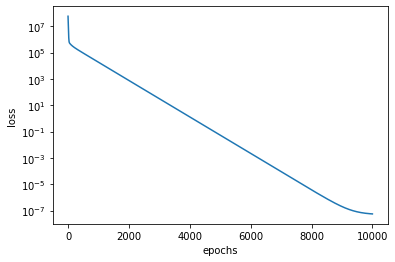

obtained weights:
[[ 0.09999999 -0.09999998  0.09999999]
 [-0.09999998  0.49999997 -0.09999998]
 [ 0.09999999 -0.09999998  0.09999999]]


In [179]:
A, y = preprocess(img_src, img_dst)
w = GD(A, y)
w = w.reshape((3,3))
print(f'obtained weights:\n{w}')